# **Car Price Prediction Multiple Linear Regression**

 **Michael, Duminda, Collins**

The purpose of this data analysis it to build models that explain car prices based on available features. Management will use it to see how different factors affect pricing, adjusting car designs and strategies to hit target price points, and better understand pricing in new markets.

### **Importing Required Libraries and Data**

Before any data analysis is completed it is key to import the necessary libraries ready for any work completed with the raw data

In [95]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())

c:\MyStuff\CodeInstitute\Projects\ci-hackathon\DataAnalyticsHackathon\jupyter_notebooks


First, need to extract the row data set 

In [96]:
# Extract the dataset
df = pd.read_csv('../data/CarPrice_Assignment.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
with pd.option_context('display.max_columns', None):
    print(df.head())

Dataset shape: (205, 26)

First 5 rows:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  cu

# Understand the data

Need to have the initial look at the data set in high level

In [97]:
# How many rows and columns
print("=== How many rows and columns ===")
print(df.shape)
# What are the column name
print("=== What are the column name ===")
print(df.columns)

# Data counts 
print("=== Data counts ===")
print(df.info())
# NA counts
print("=== Is there any nulls ===")
print(df.isna().sum())

# Duplicate counts
print("=== Is there any duplicated rows ===")
print(df.duplicated().sum())



=== How many rows and columns ===
(205, 26)
=== What are the column name ===
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
=== Data counts ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody 

Check for Data Quality to plan the data cleaning steps

In [98]:
# Data Quality Check
print("Missing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
display(df.describe())

Missing values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Data types:
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Need to check the categorical variables to plan the feature engineering

In [99]:
# Check categorical variables
print("Unique values in categorical columns:")
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                   'drivewheel', 'enginelocation', 'enginetype', 
                   'cylindernumber', 'fuelsystem']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Unique values in categorical columns:
fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Check the Basic stats for numeric columns to plan the required data cleaning

In [100]:
# Basic stats for numeric columns
print("=== Basic stats for numeric columns ===")
print(df.describe())

=== Basic stats for numeric columns ===
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
st

Need to check for outliers to plan the required data cleaning

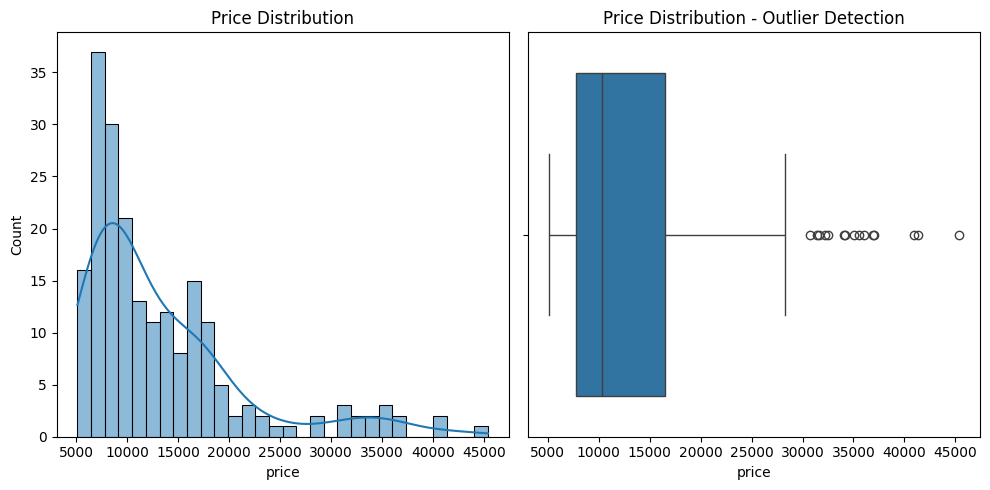

In [101]:
# Check for outliers in price
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(x=df['price'], bins=30, kde=True)
plt.title('Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Price Distribution - Outlier Detection')


plt.tight_layout()
plt.show()

Check for outliers to Car Size features to plan the data cleaning

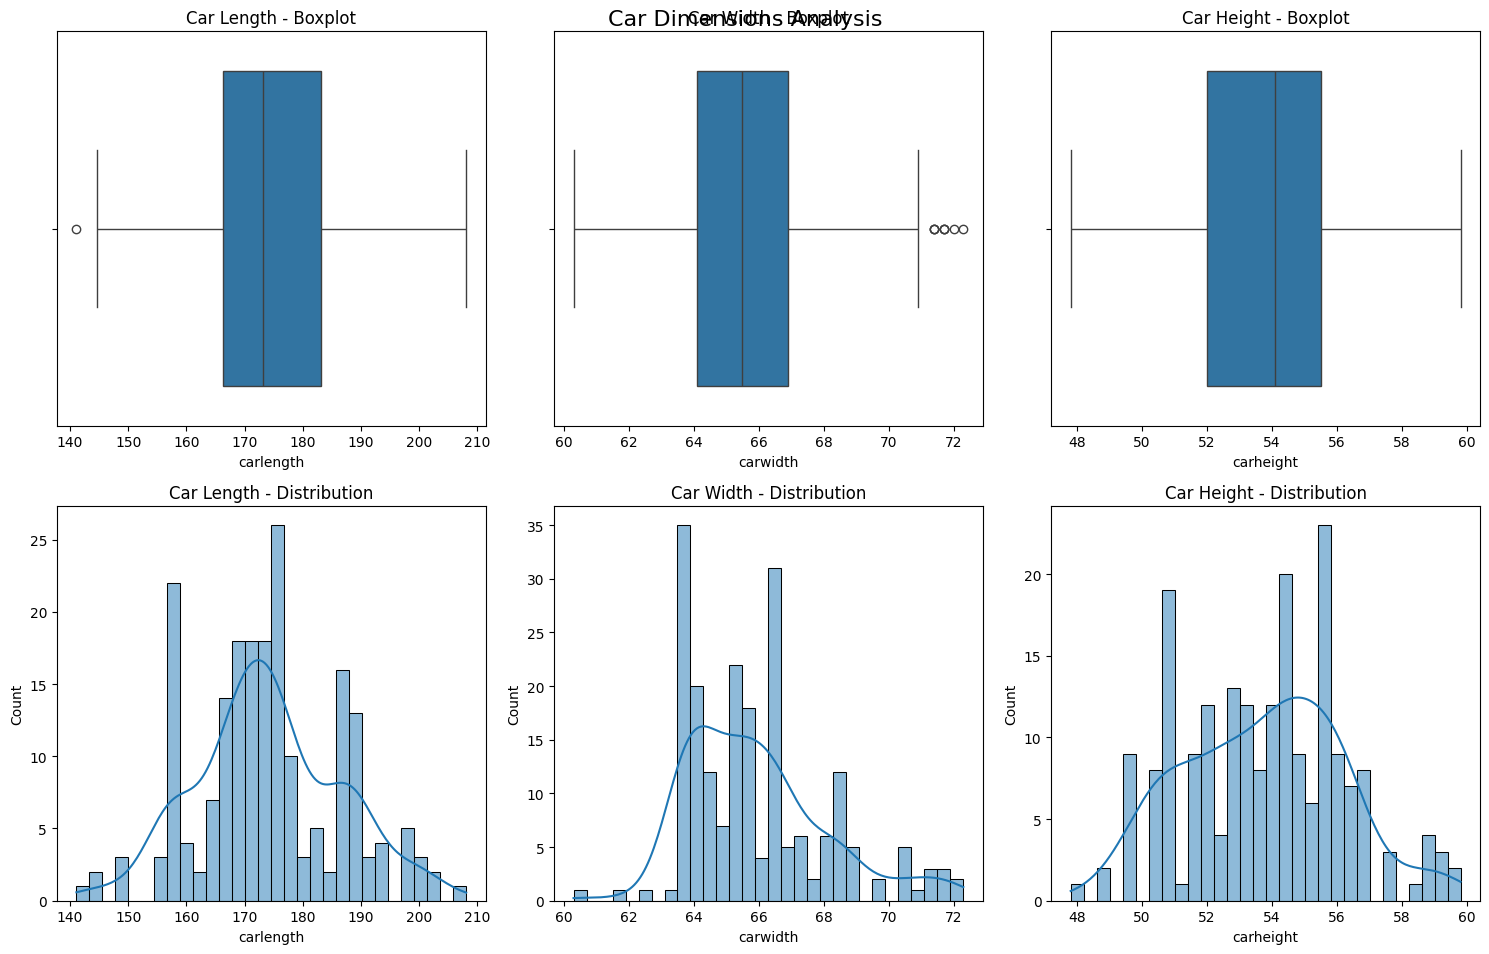

In [102]:
# Check for outliers in Car Size features
def plot_car_size_distributions(df):
    plt.figure(figsize=(15, 10))
    plt.suptitle('Car Dimensions Analysis', fontsize=16, y=0.95)

    # Row 1: Boxplots
    plt.subplot(2, 3, 1)
    sns.boxplot(x=df['carlength'])
    plt.title('Car Length - Boxplot')

    plt.subplot(2, 3, 2)
    sns.boxplot(x=df['carwidth'])
    plt.title('Car Width - Boxplot')

    plt.subplot(2, 3, 3)
    sns.boxplot(x=df['carheight'])
    plt.title('Car Height - Boxplot')

    # Row 2: Histograms
    plt.subplot(2, 3, 4)
    sns.histplot(x=df['carlength'], bins=30, kde=True)
    plt.title('Car Length - Distribution')

    plt.subplot(2, 3, 5)
    sns.histplot(x=df['carwidth'], bins=30, kde=True)
    plt.title('Car Width - Distribution')

    plt.subplot(2, 3, 6)
    sns.histplot(x=df['carheight'], bins=30, kde=True)
    plt.title('Car Height - Distribution')

    plt.tight_layout()
    plt.show()

plot_car_size_distributions(df)

Check for outliers to Car performance features to plan the data cleaning

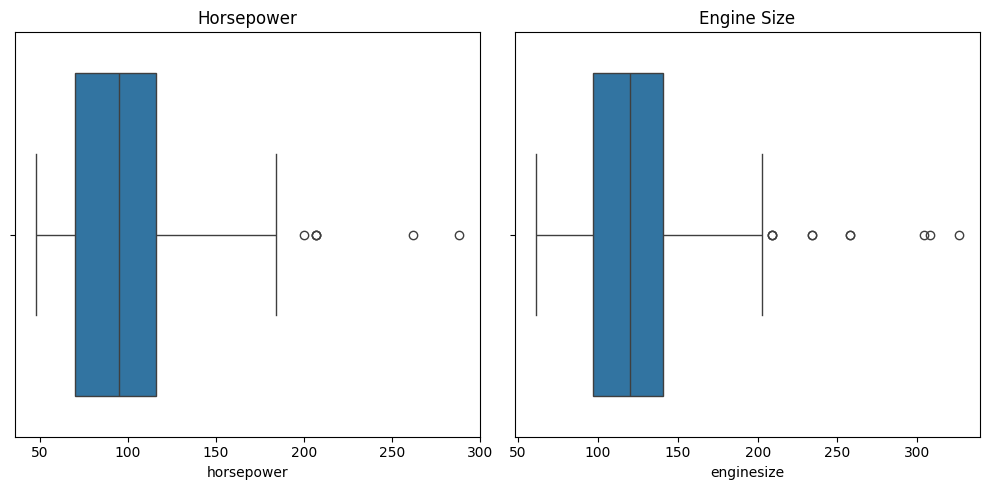

In [103]:
# Check for outliers in Car performance features
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['horsepower'])
plt.title('Horsepower')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['enginesize'])
plt.title('Engine Size')

plt.tight_layout()
plt.show()

Check for outliers to fuel efficency features to plan the data cleaning

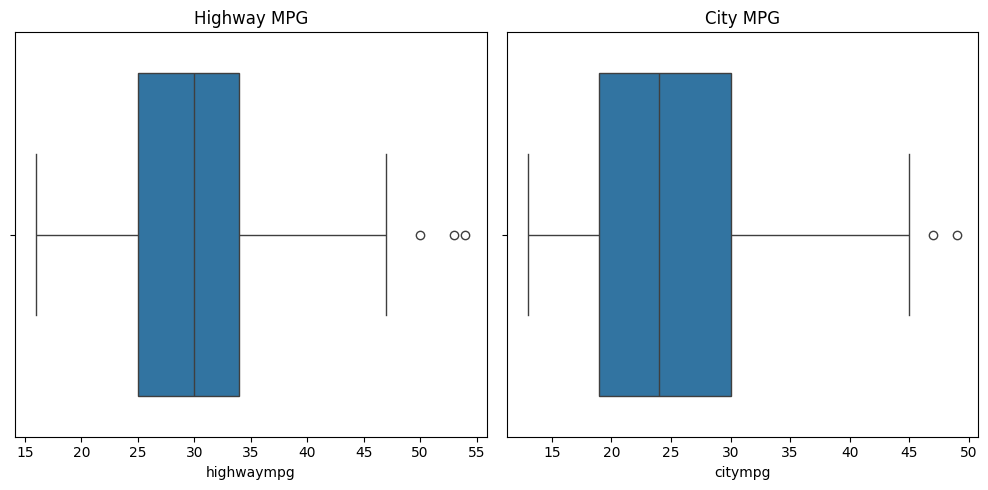

In [104]:
# Check for outliers in Fuel Efficiency features
def plot_fuel_efficiency_distributions(df):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df['highwaympg'])
    plt.title('Highway MPG')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['citympg'])
    plt.title('City MPG')

    plt.tight_layout()
    plt.show()

plot_fuel_efficiency_distributions(df)

# DATA CLEANING 

Dats set is pretty much clean 
- No NA
- No duplicates to address
- Price, size and Perfromnce Outliers are not be considered as outliers in the bsuienss context and the EDA goal

In [105]:
# Still runnig initial data cleaning steps for duplicates and missing values to make sure data quality is good

# Drop duplicate records
df = df.drop_duplicates()

# Drop rows with missing values (can be adapted to fillna if needed)
df = df.dropna()

# Initial cleaned dataset
df_cleaned = df.reset_index(drop=True)
print("Cleaned dataset shape:", df_cleaned.shape)

Cleaned dataset shape: (205, 26)


Handling Outlier: Keep them

Business Justifications:
- Luxury Market Representation: High-priced outliers (Porsche, Jaguar, BMW) represent the luxury segment your company needs to understand
- Market Reality: These are genuine market prices, not data errors
- Strategic Value: Understanding premium segments helps positioning strategy
- Small Dataset Impact: Removing outliers would reduce an already small dataset significantly


Check the data quality

In [106]:
# Data quality checks
print("\n Data Integrity Checks")
print(f"✓ No duplicate IDs: {df_cleaned['car_ID'].is_unique}")
print(f"✓ No missing prices: {df_cleaned['price'].isnull().sum() == 0}")
print(f"✓ All prices positive: {(df_cleaned['price'] > 0).all()}")


 Data Integrity Checks
✓ No duplicate IDs: True
✓ No missing prices: True
✓ All prices positive: True


# TRANSFORMATION

Define Brand and Model from CarName

In [107]:
df_transformed = df_cleaned.copy()
df_transformed.shape

(205, 26)

In [108]:
# Extract brand (first word)
df_transformed['Brand'] = df_transformed['CarName'].str.split(' ').str[0].str.lower().str.strip()

# Extract model (everything after first word)
df_transformed['Model'] = df_transformed['CarName'].str.split(' ').str[1:].str.join(' ').str.strip()

print("\n Print first 5 rows of CarName, Brand, Model:")
print(df_transformed[['CarName', 'Brand', 'Model']].head(5))

print("\n Print unique brands:")
print(df_transformed['Brand'].unique())

print("\n Print number of missing values in Brand and Model columns:")
print(df_transformed['Brand'].isnull().sum())
print(df_transformed['Model'].isnull().sum())


 Print first 5 rows of CarName, Brand, Model:
                    CarName        Brand         Model
0        alfa-romero giulia  alfa-romero        giulia
1       alfa-romero stelvio  alfa-romero       stelvio
2  alfa-romero Quadrifoglio  alfa-romero  Quadrifoglio
3               audi 100 ls         audi        100 ls
4                audi 100ls         audi         100ls

 Print unique brands:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']

 Print number of missing values in Brand and Model columns:
0
0


Standardize company names for better analysis

In [109]:
# Standardize company names
brand_mapping = {
    'alfa-romero': 'alfa_romeo', 'maxda': 'mazda', 'porcshce': 'porsche',
    'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}
df_transformed['Brand'] = df_transformed['Brand'].replace(brand_mapping)

print("\n Print unique brands:")
print(df_transformed['Brand'].unique())



 Print unique brands:
['alfa_romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


Add the regions for each car brand so we will add this as a column

In [110]:
region_mapping = {
    'alfa_romeo': 'Europe', 'audi': 'Europe', 'bmw': 'Europe', 
    'chevrolet': 'North America', 'chrysler': 'North America', 
    'datsun': 'Asia', 'dodge': 'North America', 'ferrari': 'Europe',
    'fiat': 'Europe', 'ford': 'North America', 'gmc': 'North America', 
    'honda': 'Asia', 'isuzu': 'Asia', 'jaguar': 'Europe', 'lancia': 'Europe',
    'lada': 'Europe', 'mazda': 'Asia', 'mercedes-benz': 'Europe',
    'mercury': 'North America', 'mitsubishi': 'Asia', 'nissan': 'Asia',
    'peugeot': 'Europe', 'plymouth': 'North America', 'porsche': 'Europe',
    'renault': 'Europe', 'saab': 'Europe', 'subaru': 'Asia', 'toyota': 'Asia',
    'volkswagen': 'Europe', 'vw': 'Europe', 'volvo': 'Europe','buick': 'North America'
}

# Add region column
df_transformed['region'] = df_transformed['Brand'].map(region_mapping).fillna('Other')
print("\n Print unique regions:")
# Print the count of unique regions
print(df_transformed['region'].value_counts())


 Print unique regions:
region
Asia             109
Europe            68
North America     28
Name: count, dtype: int64


We want to change cylindernumber to numerical so that it is easier to process.

In [111]:
# Mapping dictionary
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

# Apply mapping
df_transformed['cylindernumber'] = df_transformed['cylindernumber'].map(cylinder_map)


Create a volume column to help with our analysis.

In [112]:
# Create Volume feature
df_transformed['volume'] = df_transformed['carwidth'] * df_transformed['carheight'] * df_transformed['curbweight']
df_transformed.rename(columns={'Volume ': 'volume'}, inplace=True)
df_transformed['volume_scaled'] = (df_transformed['volume'] - df_transformed['volume'].min()) / (df_transformed['volume'].max() - df_transformed['volume'].min())
print("✓ Created volume and volume_scaled features")

✓ Created volume and volume_scaled features


Create correlation features for supportng EDA
- Engine Performance (Performance Index) = (Horsepower × Peak RPM) / (Curb Weight × Compression Ratio)
- And the other features to support the analysis 
- 

In [113]:
#  Create correlation features

# Create engine performance feature (Performance Index)
df_transformed['curbweight_kg'] = df_transformed['curbweight'] * 0.453592
df_transformed['engine_performance'] = (df_transformed['horsepower']*df_transformed['peakrpm']) / (df_transformed['curbweight_kg']*df_transformed['compressionratio'])

# Create average fuel efficiency
df_transformed['fuel_efficiency'] = (df_transformed['citympg'] + df_transformed['highwaympg']) / 2

# Create performance ratio
df_transformed['price_per_hp'] = df_transformed['price'] / df_transformed['horsepower']

# Create car space feature
df_transformed['car_size'] = df_transformed['carlength'] * df_transformed['carwidth'] * df_transformed['carheight']

# Create luxury brand flag
luxury_brands = ['porsche', 'jaguar', 'bmw', 'buick', 'audi']
df_transformed['is_luxury'] = df_transformed['Brand'].str.lower().isin(luxury_brands)

print("✓ Created correlation features")

✓ Created correlation features


Before we try locate any contradictions we will confirm the data is stored in their correct formats. 

In [114]:
# Data quality checks
print("\n Data Integrity Checks Summary")
print(f"✓ No missing vaklues: {df_transformed.isnull().sum().isnull().sum() == 0}")

print("\n Data Integrity Checks")
print (df_transformed.isnull().sum())

print("\n Data Types")
print(df_transformed.dtypes)

print("\n Data Preview")
print(df_transformed.head())


 Data Integrity Checks Summary
✓ No missing vaklues: True

 Data Integrity Checks
car_ID                0
symboling             0
CarName               0
fueltype              0
aspiration            0
doornumber            0
carbody               0
drivewheel            0
enginelocation        0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber        0
enginesize            0
fuelsystem            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
Brand                 0
Model                 0
region                0
volume                0
volume_scaled         0
curbweight_kg         0
engine_performance    0
fuel_efficiency       0
price_per_hp          0
car_size              0
is_luxury             0
dtype: int64

 Data Types
car

### **VERIFICATION : Locating contradictions in the data frame**

Here I will try and locate any contradictions in the dataframe using their unique values.

In [115]:
# Filtering columns based on their data types
col_object = df_transformed.select_dtypes(include=['object']).columns
col_object

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'Brand',
       'Model', 'region'],
      dtype='object')

In [116]:
# Reorder columns with 'car_ID' first
cols = df_transformed.columns.tolist()
new_order = ['car_ID'] + [col for col in cols if col != 'car_ID']
df_transformed = df_transformed[new_order]
print(df_transformed['Brand'].apply(type).value_counts())

Brand
<class 'str'>    205
Name: count, dtype: int64


Running the brand code again we can see if the typos are removed.

In [117]:
unique_brands = df_transformed['Brand'].unique()
print(unique_brands)
print(df_transformed['Brand'].apply(type).value_counts())

['alfa_romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
Brand
<class 'str'>    205
Name: count, dtype: int64


Capitlising names

In [118]:
# Capitlising names - REMOVED AS THERE ARE MANY CHANGES TOBE DONE IN THE DASHBOARD TO ACCOMODATE THIS
# df_transformed.columns = [col.title() for col in df_transformed.columns]
# df_transformed.head()

Here we need to try locate any issues that may have occured with the values in the dataframe.

We will check the first 5 rows and see if there is any unusual data and fix them if needed.

In [119]:
print(df_transformed.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...         Model  \
0  convertible        rwd          front       88.6  ...        giulia   
1  convertible        rwd          front       88.6  ...       stelvio   
2    hatchback        rwd          front       94.5  ...  Quadrifoglio   
3        sedan        fwd          front       99.8  ...        100 ls   
4        sedan        4wd          front       99.4  ...         100ls   

   region       volume  volume_scaled curbweight_kg  engine_performa

There appears to be no unusual data so we will not need to alter it at all.

As there appears to be no errors we are now happy to move onto saving this clean data. 

In [120]:
print(df_transformed.columns.tolist())


['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Brand', 'Model', 'region', 'volume', 'volume_scaled', 'curbweight_kg', 'engine_performance', 'fuel_efficiency', 'price_per_hp', 'car_size', 'is_luxury']


Here we have re ordered the dataframe so that the new columns are at the front.

In [124]:
df_transformed = df_transformed.reset_index(drop=True)
df_transformed.shape

(205, 37)

Here we have reset the index for dropping duplicates

In [122]:
# Move 'car_ID' to the front
df_transformed = df_transformed[['car_ID'] + [col for col in df_transformed.columns if col != 'car_ID']]


### **Saving the clean data**

The data is cleaned to satisfying standard and will be saved to a new data file.

In [123]:
#Load the transformed data set as Cleaned_Car_Price
df_transformed.to_csv('../Data/Cleaned_Car_Price.csv', index=False)
print("Data saved to ../Data/Cleaned_Car_Price.csv")

Data saved to ../Data/Cleaned_Car_Price.csv
